In [1]:
#IMPORT REQUIRED LIBRARIES
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px


In [2]:
df = pd.read_csv("bank.csv", sep=";")
df.head()




,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [3]:
df.shape


(4521, 17)

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [5]:
df.describe()


,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [6]:
df.describe(include="object")


,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,4521,4521,4521,4521,4521,4521,4521,4521,4521,4521
unique,12,3,4,2,2,2,3,12,4,2
top,management,married,secondary,no,yes,no,cellular,may,unknown,no
freq,969,2797,2306,4445,2559,3830,2896,1398,3705,4000


In [7]:
df.isnull().sum()


age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [8]:
df.duplicated().sum()

df = df.drop_duplicates()



In [9]:
for col in ['job','marital','education','contact','poutcome','y']:
    df[col] = df[col].str.lower()



In [10]:
total_customers = len(df)
total_conversions = df[df['y'] == 'yes'].shape[0]
conversion_rate = (total_conversions / total_customers) * 100

print("Total Customers Contacted:", total_customers)
print("Total Conversions:", total_conversions)
print(f"Overall Conversion Rate: {conversion_rate:.2f}%")


Total Customers Contacted: 4521
Total Conversions: 521
Overall Conversion Rate: 11.52%


In [11]:
funnel_df = pd.DataFrame({
    "Stage": ["Contacted", "Reached", "Interested", "Converted"],
    "Users": [
        len(df),
        len(df[df['contact'] != 'unknown']),
        len(df[(df['campaign'] <= 2) | (df['previous'] > 0)]),
        len(df[df['y'] == 'yes'])
    ]
})

funnel_df["Conversion Rate (%)"] = funnel_df["Users"] / funnel_df["Users"].iloc[0] * 100
funnel_df


,Stage,Users,Conversion Rate (%)
0,Contacted,4521,100.000000
1,Reached,3197,70.714444
2,Interested,3182,70.382659
3,Converted,521,11.523999


In [12]:
fig = px.funnel(
    funnel_df,
    x="Users",
    y="Stage",
    title="Marketing Funnel – Bank Campaign"
)
fig.show()


In [13]:
channel_kpi = (
    df.groupby('contact')['y']
    .apply(lambda x: (x == 'yes').mean() * 100)
    .reset_index(name='Conversion Rate (%)')
)

channel_kpi


,contact,Conversion Rate (%)
0,cellular,14.364641
1,telephone,14.617940
2,unknown,4.607251


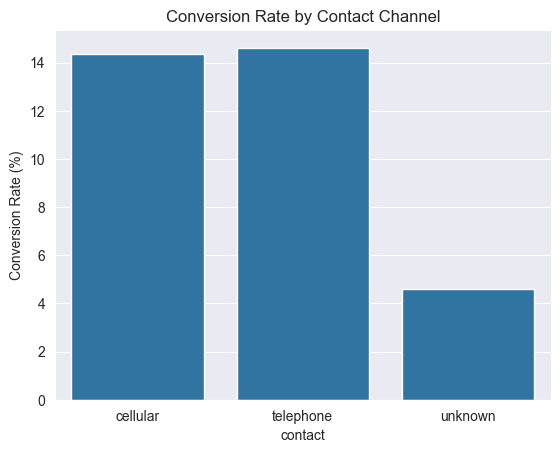

In [14]:
sns.barplot(data=channel_kpi, x='contact', y='Conversion Rate (%)')
plt.title("Conversion Rate by Contact Channel")
plt.show()


In [15]:
campaign_kpi = (
    df.groupby('campaign')['y']
    .apply(lambda x: (x == 'yes').mean() * 100)
    .reset_index(name='Conversion Rate (%)')
)

campaign_kpi.head(10)


,campaign,Conversion Rate (%)
0,1,13.840830
1,2,10.917722
2,3,10.215054
3,4,13.230769
4,5,5.389222
5,6,10.322581
6,7,8.000000
7,8,7.142857
8,9,6.666667
9,10,3.703704


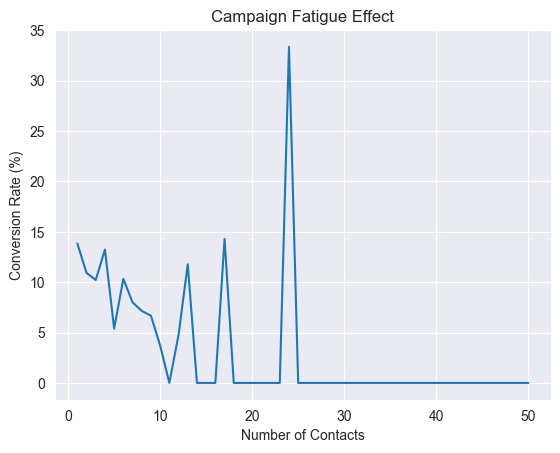

In [16]:
plt.plot(campaign_kpi['campaign'], campaign_kpi['Conversion Rate (%)'])
plt.xlabel("Number of Contacts")
plt.ylabel("Conversion Rate (%)")
plt.title("Campaign Fatigue Effect")
plt.show()


In [17]:
prev_kpi = (
    df.groupby('poutcome')['y']
    .apply(lambda x: (x == 'yes').mean() * 100)
    .reset_index(name='Conversion Rate (%)')
)

prev_kpi


,poutcome,Conversion Rate (%)
0,failure,12.857143
1,other,19.289340
2,success,64.341085
3,unknown,9.095816


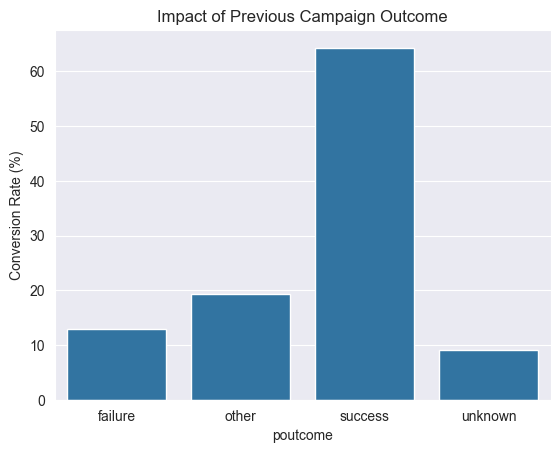

In [18]:
sns.barplot(data=prev_kpi, x='poutcome', y='Conversion Rate (%)')
plt.title("Impact of Previous Campaign Outcome")
plt.show()


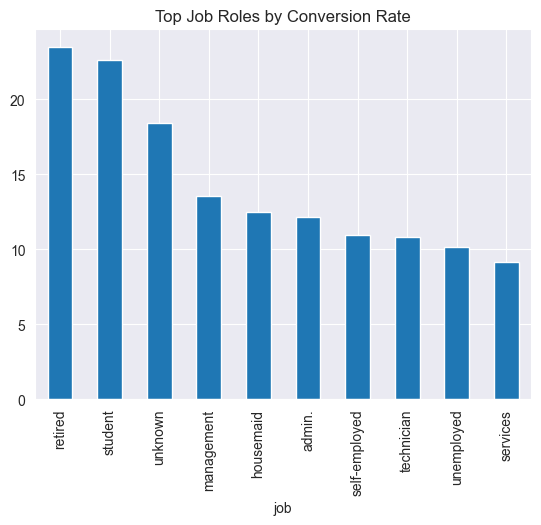

In [19]:
job_kpi = (
    df.groupby('job')['y']
    .apply(lambda x: (x == 'yes').mean() * 100)
    .sort_values(ascending=False)
    .head(10)
)

job_kpi.plot(kind='bar')
plt.title("Top Job Roles by Conversion Rate")
plt.show()


In [20]:
df['age_group'] = pd.cut(
    df['age'],
    bins=[18,30,40,50,60,100],
    labels=['18-30','31-40','41-50','51-60','60+']
)

age_kpi = (
    df.groupby('age_group', observed=False)['y']
    .apply(lambda x: (x == 'yes').mean() * 100)
    .reset_index(name='Conversion Rate (%)')
)


age_kpi


,age_group,Conversion Rate (%)
0,18-30,14.240506
1,31-40,9.888889
2,41-50,10.585198
3,51-60,10.250000
4,60+,37.795276


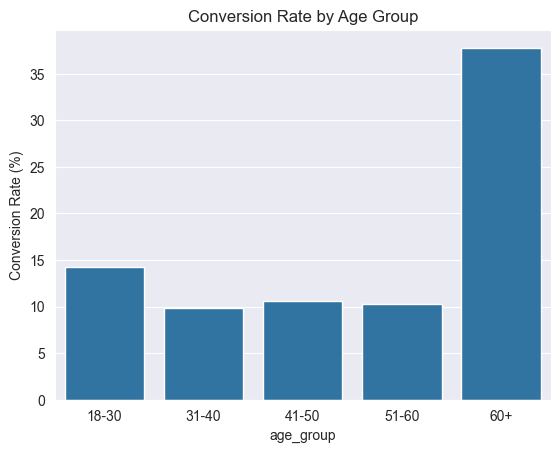

In [21]:
sns.barplot(data=age_kpi, x='age_group', y='Conversion Rate (%)')
plt.title("Conversion Rate by Age Group")
plt.show()


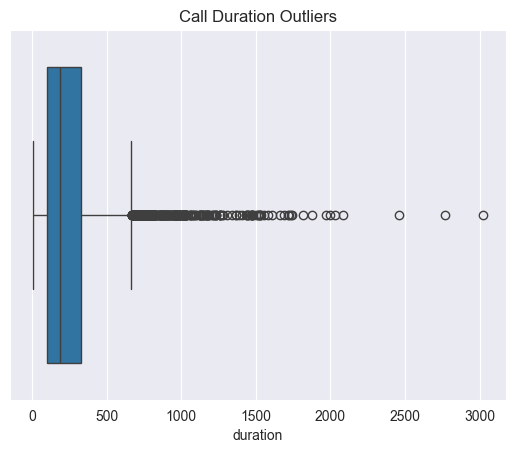

In [22]:
sns.boxplot(x=df['duration'])
plt.title("Call Duration Outliers")
plt.show()


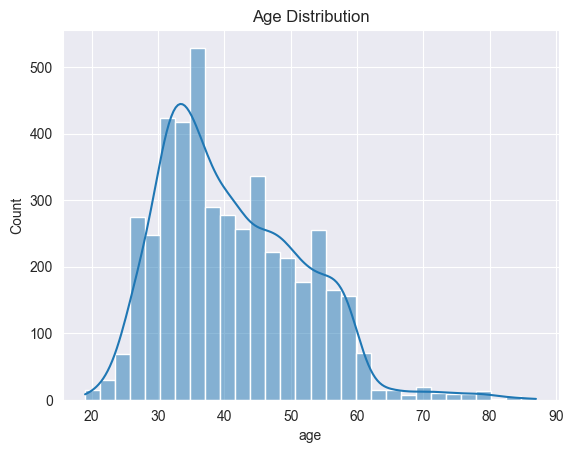

In [23]:
sns.histplot(df['age'], bins=30, kde=True)
plt.title("Age Distribution")
plt.show()


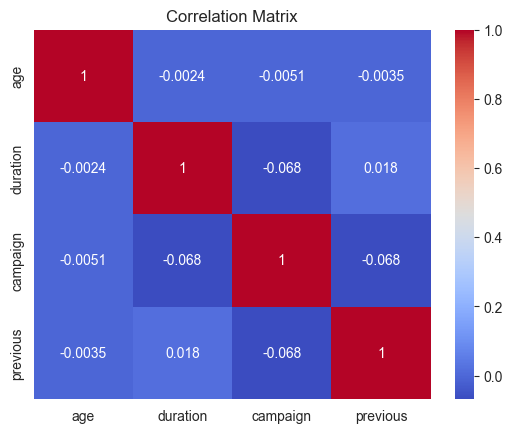

In [24]:
corr = df[['age','duration','campaign','previous']].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


In [25]:
print("""
FINAL BUSINESS INSIGHTS:
- Overall conversion rate is low, indicating optimization potential.
- Cellular channel outperforms telephone in conversions.
- Conversion decreases after multiple contact attempts (campaign fatigue).
- Customers with previous successful outcomes convert significantly better.
- Certain job roles and age groups show higher conversion rates.
""")



FINAL BUSINESS INSIGHTS:
- Overall conversion rate is low, indicating optimization potential.
- Cellular channel outperforms telephone in conversions.
- Conversion decreases after multiple contact attempts (campaign fatigue).
- Customers with previous successful outcomes convert significantly better.
- Certain job roles and age groups show higher conversion rates.

